___
# Ciência dos Dados - PROJETO 1

## Gabriel Couto & Daniel Castro

#### Importando bibliotecas e preparando DataFrame:

In [145]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [146]:
#Se já existir o output ele o carrega, se não ele carrega a PNAD inteira e salva o output
if os.path.isfile('./output.csv') == True:
    dados = pd.read_table("output.csv", encoding="utf-8", sep=";", index_col=False)

else:
    tabela = pd.read_table("PES2015.csv", encoding="windows-1252", sep=",")
    
    colunas = ['V8005','V0302','V4704','V4707','UF','V4719']

    dados = tabela.loc[:,colunas]

    #Adotando nomes mais identificáveis às colunas:
    colunas[0] = 'Idade' 
    colunas[1] = 'Sexo'
    colunas[2] = 'Economicamente' #Condição de atividade na semana
    colunas[3] = 'CHT' #Horas trabalhadas na semana em todos empregos (Carga Horária de Trabalho semanal)
    colunas[4] = 'Local' # (Norte, Nordeste, Centro-Oeste, Sudeste, Sul)
    colunas[5] = 'Salario' #Rendimento mensal de todos os trabalhos

    #Renomeando colunas
    dados.columns = colunas 

    #Unindo estados por regiões:
    dados.Local = dados.Local//10 

    #Definindo as variáveis qualitativas como categóricas:
    for i in range(1,5): #1 a 4
        dados[colunas[i]] = dados[colunas[i]].astype('category')

    #Definindo as categorias das variáveis categóricas:
    dados[colunas[1]].cat.categories=(['Masculino','Feminino'])
    dados[colunas[2]].cat.categories=(['Ativa','Inativa'])
    dados[colunas[3]].cat.categories=(['< 14','15 a 39','40 a 44','45 a 48','> 49'])
    dados[colunas[4]].cat.categories=(['Norte','Nordeste','Sudeste','Sul','Centro-Oeste']) 
    
    # Salvar excel com os dados filtrados
    dados.to_csv('output.csv', sep=';', encoding='utf-8', index=False)


#O MESMO PARA 2011:
if os.path.isfile('./output2011.csv') == True:
    dados2011 = pd.read_table("output2011.csv", encoding="utf-8", sep=";", index_col=False)

else:
    tabela2011 = pd.read_table("PES2011.csv", encoding="windows-1252", sep=",")
    colunas2011 = ['V8005','V0302','V4704','V4719']
    dados2011 = tabela2011.loc[:,colunas2011]

    #Adotando nomes mais identificáveis às colunas:
    colunas2011[0] = 'Idade' 
    colunas2011[1] = 'Sexo'
    colunas2011[2] = 'Economicamente' #Condição de atividade na semana
    colunas2011[3] = 'Salario' #Rendimento mensal de todos os trabalhos

    #Renomeando colunas
    dados2011.columns = colunas2011

    #Definindo as variáveis qualitativas como categóricas:
    for i in range(1,3): #1 a 2
        dados2011[colunas2011[i]] = dados2011[colunas2011[i]].astype('category')

    #Definindo as categorias das variáveis categóricas:
    dados2011[colunas2011[1]].cat.categories=(['Masculino','Feminino'])
    dados2011[colunas2011[2]].cat.categories=(['Ativa','Inativa'])

    # Salvar excel com os dados filtrados
    dados2011.to_csv('output2011.csv', sep=';', encoding='utf-8', index=False)


## Introdução

#### Problema: Descrever perfil dos brasileiros economicamente ativos
#### Objetivo : Observar as diferenças salariais da população economicamente ativa do país de acordo com o Sexo

##### Variáveis Analizadas: <br>
&emsp; -Idade <br>
&emsp; -Sexo <br>
&emsp; -Economicamente (Ativa ou Inativa) <br>
&emsp; -CHT (Carga Horária de trabalho semanal)  <br>
&emsp; -Local <br>
&emsp; -Salário <br>
    
Obs: Apenas a populaçao economicamente ativa recebem valores nas variáveis 'CHT' e 'Salario

___
## Filtros da base de dados <br>
&emsp; 1) Filtrar adultos (a partir de 18 anos) <br>
&emsp; 2) Filtrar pessoas com o salário (999 999 999 999 = não declararam)  <br>

In [147]:
#Filtrando maiores de 18 anos:
dados = dados[dados.Idade>=18]
#Retirando pessoas com salário 999 999 999 999 (não declararam)
dados = dados[dados.Salario!=999999999999]

#Para 2011:
dados2011 = dados2011[dados2011.Idade>=18]
dados2011 = dados2011[(dados2011.Salario!=999999999999)&(dados2011.Salario!=1000000000000)]

dados.head()

,Idade,Sexo,Economicamente,CHT,Local,Salario
0,23,Masculino,Ativa,40 a 44,Norte,800.0
1,23,Feminino,Ativa,40 a 44,Norte,1150.0
2,35,Feminino,Ativa,40 a 44,Norte,880.0
3,34,Masculino,Ativa,> 49,Norte,3000.0
7,18,Feminino,Ativa,40 a 44,Norte,880.0


___
## Análise e Resultados

### Análises Univariadas

#### Explorando variáveis quantitativas:

Tabela de frequências das variáveis quantitativas:

In [148]:
dados.describe().round(1)

,Idade,Salario
count,259468.0,158531.0
mean,43.2,1755.2
std,17.0,2860.2
min,18.0,0.0
25%,29.0,788.0
50%,41.0,1100.0
75%,55.0,1900.0
max,115.0,200000.0


<br>
Para análises das variáveis quantitativas nós dividimos elas em classes:<br>
OBS: Como os maiores valores de Salario são muito distantes do restante, usamos apenas os primeiros 99% para criar as classes

In [149]:
#Idade é dividida da idade mínima a máxima em faixas de 5 em 5 anos
faixaIdade = np.arange(dados.Idade.min(),dados.Idade.max(),5)
Idadecat = pd.cut(dados.Idade[dados.Economicamente=='Ativa'], bins=faixaIdade, right=False)

#Salario é dividido do salário mínimo ao máximo em 50 faixas igualmente espaçadas
perc99Salario = dados.Salario[dados.Salario > 0].quantile(0.99)
faixaSalario = np.linspace(dados.Salario.min(),perc99Salario,50)
Salariocat = pd.cut(dados.Salario[dados.Economicamente=='Ativa'], bins=faixaSalario, right=False)

Gráfico de colunas para Salário e Idade para a população em geral:

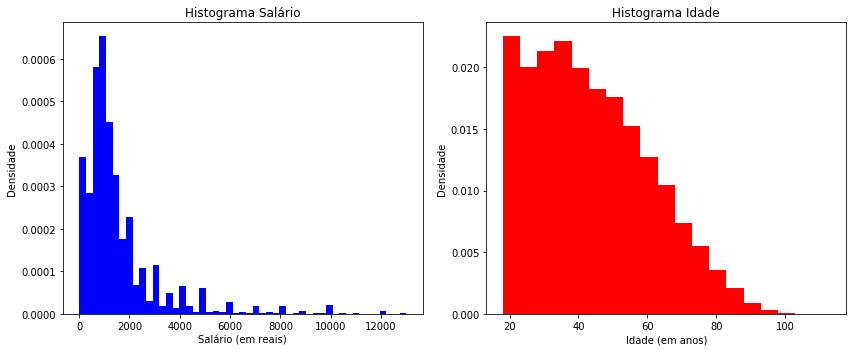

In [209]:
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
plot = dados.Salario.plot.hist(bins=faixaSalario, title='Histograma Salário', density=True, color='blue')
plt.ylabel('Densidade')
plt.xlabel('Salário (em reais)')

plt.subplot(122)
plot = dados.Idade.plot.hist(bins=faixaIdade, title='Histograma Idade', density=True, color='red')
plt.ylabel('Densidade')
plt.xlabel('Idade (em anos)')

plt.tight_layout()
plt.show()

#### Explorando variáveis quantitativas:

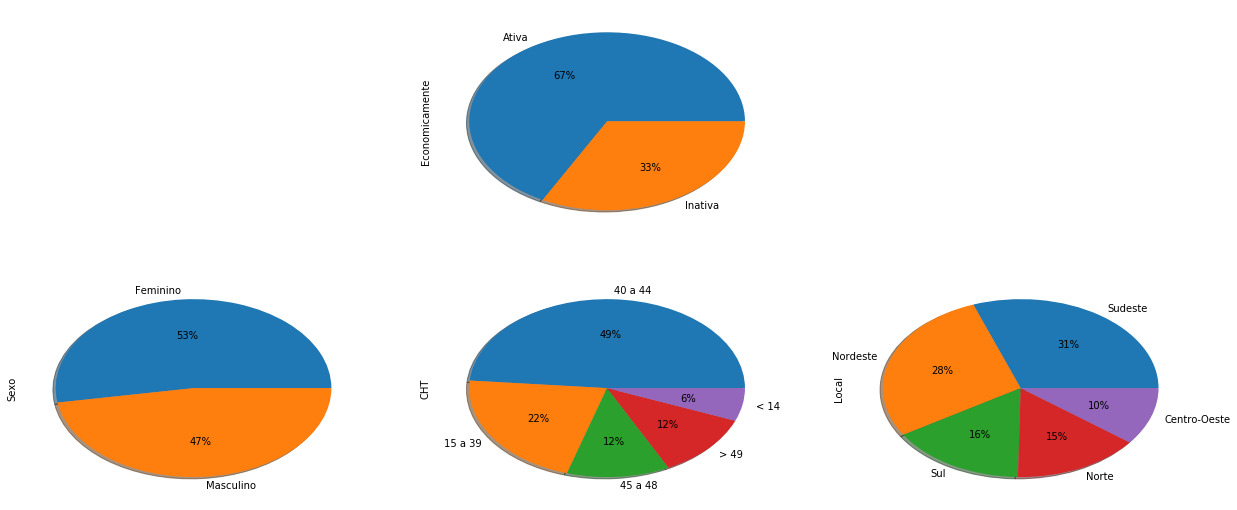

In [203]:
fig = plt.figure(figsize=(21,9))

ax1 = plt.subplot2grid((2,3), (0,1)) #(linhas,col) do grid e depois (linha,col) do item
dados.Economicamente.value_counts().plot.pie(autopct='%1.0f%%', shadow = True)

ax1 = plt.subplot2grid((2,3), (1, 0))
dados.Sexo.value_counts().plot.pie(autopct='%1.0f%%', shadow = True)

ax1 = plt.subplot2grid((2,3), (1, 1))
dados.CHT.value_counts().plot.pie(autopct='%1.0f%%', shadow = True)

ax1 = plt.subplot2grid((2,3), (1, 2))
dados.Local.value_counts().plot.pie(autopct='%1.0f%%', shadow = True);

### Análise Multivariada

In [152]:
# grafico=pd.crosstab(dados.Local,dados.Economicamente,margins=True,rownames=['Local'], colnames=['Economicamente'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Pessoas economicamente ativas por Local');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')

In [153]:
# grafico=pd.crosstab(dados.Local,dados.Sexo[(dados.Economicamente=='Ativa')],margins=True,rownames=['Local'], colnames=['Sexo'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Pessoas Economicamente Ativas por Local');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')

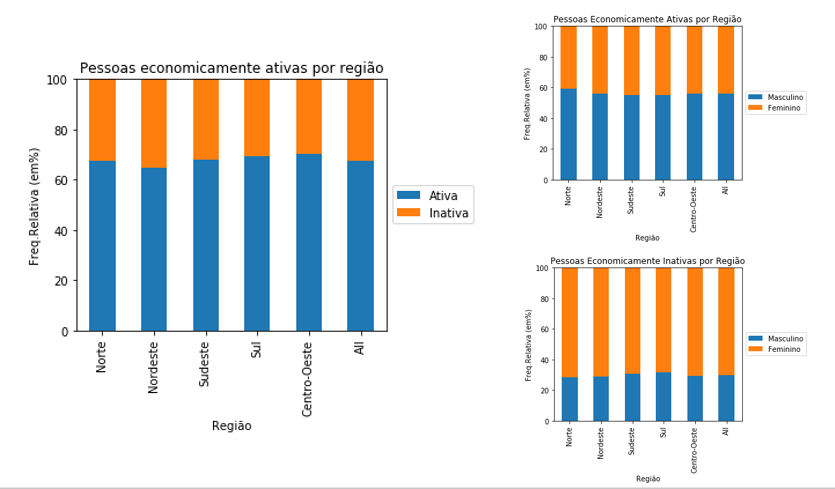

In [211]:
# grafico=pd.crosstab(dados.Local,dados.Sexo[(dados.Economicamente=='Inativa')],margins=True,rownames=['Local'], colnames=['Sexo'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Pessoas Economicamente Inativas por Local');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')
Image("img/grafico_economicamente.png")

###### Há menos mulheres que homens economicamente ativos

In [155]:
# grafico=pd.crosstab(dados.Local[(dados.Economicamente=='Ativa')&(dados.Sexo=='Feminino')],dados['CHT'],margins=True,rownames=['Local'], colnames=['CH de Trabalho (h)'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Carga horária de trabalho das mulheres');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')

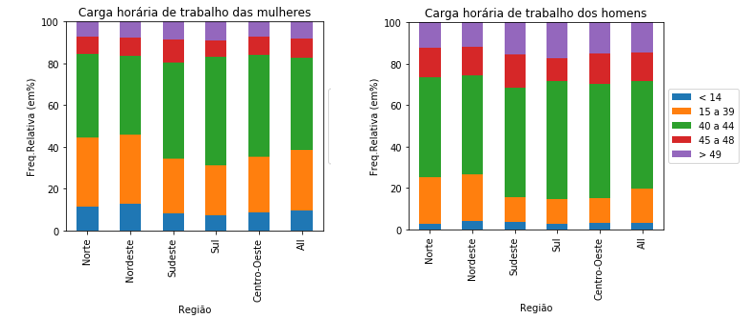

In [213]:
# grafico=pd.crosstab(dados.Local[(dados.Economicamente=='Ativa')&(dados.Sexo=='Masculino')],dados['CHT'],margins=True,rownames=['Local'], colnames=['CH de Trabalho (h)'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Carga horária de trabalho dos homens');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')]
Image("img/grafico_carga_horaria.png")

###### Carga horária de trabalho dos homens é maior que o das mulheres

### Diferenças salariais pra homens e mulheres:

Para análises salariais vamos retirar pessoas com salário 0 ou NaN

In [198]:
d15 = dados.loc[(dados.Economicamente=='Ativa')&(dados.Salario > 0),['Sexo','Salario']]
d11 = dados2011.loc[(dados2011.Economicamente=='Ativa')&(dados2011.Salario > 0),['Sexo','Salario']]

Diferenças salariais da população economicamente ativa do país por sexo:

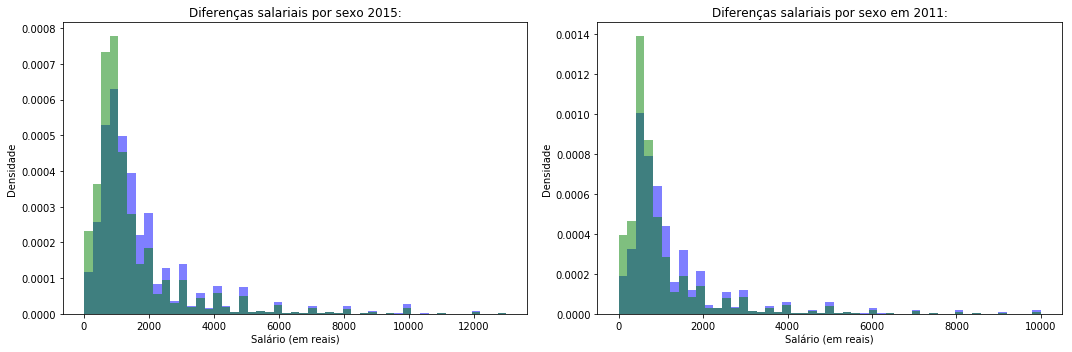

In [210]:
fig = plt.figure(figsize=(15, 5))

ax1 = plt.subplot2grid((1,2), (0,0)) #(linhas,col) do grid e depois (linha,col) do item

plot = d15[d15.Sexo=='Masculino'].Salario.plot.hist(bins=faixaSalario, title='Diferenças salariais por sexo 2015:', density=True, color='blue', alpha=0.5)
plot = d15[d15.Sexo=='Feminino'].Salario.plot.hist(bins=faixaSalario, density=True, color='g', alpha = 0.5)
plt.ylabel('Densidade')
plt.xlabel('Salário (em reais)')

ax1 = plt.subplot2grid((1,2), (0, 1))

plot = d11[d11.Sexo=='Masculino'].Salario.plot.hist(bins=np.linspace(d11.Salario.min(),d11.Salario.quantile(0.99),50), title='Diferenças salariais por sexo em 2011:', density=True, color='blue', alpha=0.5)
plot = d11[d11.Sexo=='Feminino'].Salario.plot.hist(bins=np.linspace(d11.Salario.min(),d11.Salario.quantile(0.99),50), density=True, color='g', alpha = 0.5)
plt.ylabel('Densidade')
plt.xlabel('Salário (em reais)')
plt.tight_layout()
plt.show()

###### As dispersões dos salários pros dois sexos e em ambos anos têm assimetria à direita <br>

Medidas de dispersão:

       2011 Feminino  2015 Feminino  2011 Masculino  2015 Masculino
count        60909.0        62532.0         86803.0         87116.0
mean          1137.1         1586.9          1519.4          2054.9
std           1720.7         2313.0          2564.3          3259.3
min              1.0            6.0             1.0             5.0
25%            545.0          788.0           565.0           800.0
50%            700.0         1000.0           900.0          1200.0
75%           1100.0         1600.0          1500.0          2000.0
max         125000.0       120000.0        200000.0        200000.0

Boxplot sem outliers:


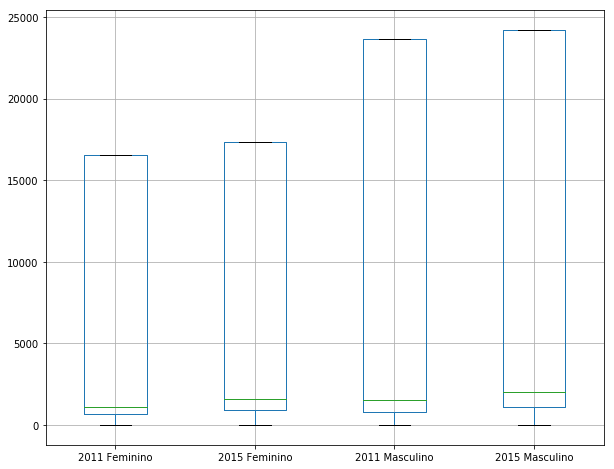

In [233]:
#Comparar salarios pras mulheres ao longo dos anos:
dicio={ '2011 Feminino':d11[d11.Sexo == 'Feminino'].Salario.describe().round(1),
        '2015 Feminino':d15[d15.Sexo == 'Feminino'].Salario.describe().round(1),
        '2011 Masculino':d11[d11.Sexo == 'Masculino'].Salario.describe().round(1),
        '2015 Masculino':d15[d15.Sexo == 'Masculino'].Salario.describe().round(1)}
comparaAnos = pd.DataFrame(data=dicio)

print(comparaAnos)
print('\nBoxplot sem outliers:')
comparaAnos.boxplot(figsize=(10,8), showfliers=False);


###### A média, assim como os 4 quartis das distribuições aumentaram pra ambos sexos, logo, houve aumento de salário pra maioria da população e não só pra uma pequena parcela.<br> As mulheres têm salários relativamente menores que os dos homens em todos os quartis pra ambos anos, isso confirma que elas realmente recebem menos que os homens.

___
## Conclusão 

Concluímos que, para identificar a causa do maior número de pessoas economicamente inativas ser do sexo feminino é necessário uma análise mais densa dos dados, porém um dos fatores é a diferença salarial que existe em nosso país que pode desistimular as mulheres a procurarem por empregos.<br>
É possível analisar também que embora os homens ganhem mais do que as mulheres eles geralmente trabalham mais tempo por semana, ou seja, talvez pelo fato de eles trabalharem mais tempo eles também recebam mais. Logo, não podemos afirmar com certeza porque as mulheres são a maior parcela inativamente econômica. <br>
Para uma próxima análise seria interessante comaparar as mulheres economicamente ativas com as inativas para identificar quais são as principais características que as levam para a atividade ou a inativade econômica. Variáveis como: Estado Civil, Número de Filhos e Escolaridade são ótimas vertentes para a nova análise.